In [ ]:
# # Predict sentiment function and test cases

# def predict_sentiment(text):
#     """
#     Takes a raw text string and predicts its sentiment using the trained model.
#     """
#     # 1. Preprocess the text using the same function from earlier
#     cleaned_text = preprocess_text(text)
    
#     # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer
#     vectorized_text = vectorizer.transform([cleaned_text])
    
#     # 3. Predict using the trained model
#     prediction = model.predict(vectorized_text)
    
#     # 4. Return the human-readable result
#     return 'Positive' if prediction[0] == 1 else 'Negative'

# # --- Test Cases ---
# review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
# review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
# review_3 = "The film was okay, not great but not terrible either. Some parts were good."

# print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
# print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
# print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")
# {
#     "cells": [
#         {
#             "cell_type": "code",
#             "id": "#VSC-e8a0660f",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "import nltk",
#                 "nltk.download('stopwords')",
#                 "nltk.download('punkt')",
#                 "nltk.download('punkt_tab')"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-fede2df2",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "import pandas as pd",
#                 "import re # for regular expressions",
#                 "from nltk.corpus import stopwords",
#                 "from nltk.tokenize import word_tokenize"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-6903ecab",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "# Load the small English model for spaCy",
#                 "import spacy",
#                 "spacy.cli.download(\"en_core_web_sm\")",
#                 "nlp = spacy.load(\"en_core_web_sm\")"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-6aed0968",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "# Set pandas to display full text for better inspection",
#                 "pd.set_option('display.max_colwidth', None)",
#                 "",
#                 "# Load the dataset from the CSV file",
#                 "try:",
#                 "    df = pd.read_csv('IMDB Dataset.csv')",
#                 "except FileNotFoundError:",
#                 "    print(\"Error: 'dataset.csv' not found. Make sure it's in the same folder as this notebook.\")",
#                 "",
#                 "# Display the first 5 rows and some info",
#                 "print(\"First 5 rows of the dataset:\")",
#                 "display(df.head())"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-627ddc52",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "print(\"\\nDataset Information:\")",
#                 "df.info()"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-08770bef",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "print(\"\\nSentiment Distribution:\")",
#                 "print(df['sentiment'].value_counts())"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-b394fece",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "# Get the list of English stop words",
#                 "stop_words = set(stopwords.words('english'))",
#                 "stop_words"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-2abb85c4",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "def preprocess_text(text):",
#                 "    \"\"\"",
#                 "    Cleans and preprocesses a single text string.",
#                 "    1. Removes HTML tags",
#                 "    2. Lowercases text",
#                 "    3. Removes punctuation and numbers",
#                 "    4. Tokenizes text",
#                 "    5. Removes stop words",
#                 "    6. Lemmatizes words",
#                 "    \"\"\"",
#                 "    text = re.sub(r'<.*?>', '', text)",
#                 "    text = text.lower()",
#                 "    text = re.sub(r'[^a-z\\s]', '', text)",
#                 "    tokens = word_tokenize(text)",
#                 "    tokens = [word for word in tokens if word not in stop_words]",
#                 "    ",
#                 "    # Lemmatization is often better than stemming",
#                 "    text = ' '.join(tokens)",
#                 "    doc = nlp(text)",
#                 "    lemmatized_tokens = [token.lemma_ for token in doc]",
#                 "    ",
#                 "    return ' '.join(lemmatized_tokens)"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-1e6c63eb",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "print(\"Preprocessing al 50,000 reviews...(This may take a while)  \\n\")",
#                 "df = df.sample(500).copy()  # Sample 500 reviews for faster processing",
#                 "df['cleaned_review'] = df['review'].apply(preprocess_text)",
#                 "print(\"Preprocessing complete. Here are the first 5 cleaned reviews:\")",
#                 "",
#                 "#Display a comparison of irginal vs cleaned review",
#                 "print(\"\\nComparison of Original vs Cleaned Reviews: \")",
#                 "display(df[['review', 'cleaned_review']].head())"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-ed377f8b",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "from sklearn.model_selection import train_test_split",
#                 "#Map sentiment labels to 0 and 1",
#                 "df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0 })",
#                 "",
#                 "#Define any features X and target y",
#                 "X = df['cleaned_review']",
#                 "y = df['sentiment_numeric']",
#                 "",
#                 "",
#                 "#Split the data into training and testing sets (80% train, 20% test)",
#                 "# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset",
#                 "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)",
#                 "print(f\"Training set size: {len(X_train)}\")",
#                 "print(f\"Testing set size: {len(X_test)}\")"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-b5c9f87d",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "from sklearn.feature_extraction.text import TfidfVectorizer",
#                 "",
#                 "# Create the vectorizer and fit/transform the training data",
#                 "vectorizer = TfidfVectorizer()",
#                 "X_train_tfidf = vectorizer.fit_transform(X_train)",
#                 "X_test_tfidf = vectorizer.transform(X_test)"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-e989c24b",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "from sklearn.linear_model import LogisticRegression",
#                 "",
#                 "# Initialize and train the model",
#                 "# solver='liblinear' is a good choice for this type of problem",
#                 "model = LogisticRegression(solver='liblinear')",
#                 "model.fit(X_train_tfidf, y_train)",
#                 "",
#                 "print(\"Model training complete!\")"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-36efd7bc",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 "def predict_sentiment(text):",
#                 "    \"\"\"",
#                 "    Takes a raw text string and predicts its sentiment using the trained model.",
#                 "    \"\"\"",
#                 "    # 1. Preprocess the text using the same function from Cell 2",
#                 "    cleaned_text = preprocess_text(text)",
#                 "    ",
#                 "    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5",
#                 "    vectorized_text = tfidf.transform([cleaned_text])",
#                 "    ",
#                 "    # 3. Predict using the trained model from Cell 6",
#                 "    prediction = model.predict(vectorized_text)",
#                 "    ",
#                 "    # 4. Return the human-readable result",
#                 "    return 'Positive' if prediction[0] == 1 else 'Negative'",
#                 "",
#                 "# --- Test Cases ---",
#                 "review_1 = \"This movie was absolutely fantastic! The acting was superb and the plot was gripping.\"",
#                 "review_2 = \"I was so bored throughout the entire film. It was a complete waste of time and money.\"",
#                 "review_3 = \"The film was okay, not great but not terrible either. Some parts were good.\"",
#                 "",
#                 "print(f\"Review: '{review_1}'\\nPredicted Sentiment: {predict_sentiment(review_1)}\\n\")",
#                 "print(f\"Review: '{review_2}'\\nPredicted Sentiment: {predict_sentiment(review_2)}\\n\")",
#                 "print(f\"Review: '{review_3}'\\nPredicted Sentiment: {predict_sentiment(review_3)}\\n\")"
#             ]
#         },
#         {
#             "cell_type": "code",
#             "id": "#VSC-23d65fde",
#             "metadata": {
#                 "language": "python"
#             },
#             "source": [
#                 ""
#             ]
#         }
#     ]
# }

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [2]:
import pandas as pd
import re # for regular expressions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Load the small English model for spaCy
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# Set pandas to display full text for better inspection
pd.set_option('display.max_colwidth', None)

# Load the dataset from the CSV file
try:
    df = pd.read_csv('IMDB Dataset.csv')
except FileNotFoundError:
    print("Error: 'dataset.csv' not found. Make sure it's in the same folder as this notebook.")

# Display the first 5 rows and some info
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [6]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [8]:
# Get the list of English stop words
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [9]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [10]:
print("Preprocessing al 50,000 reviews...(This may take a while)  \n")
df = df.sample(500).copy()  # Sample 500 reviews for faster processing
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("Preprocessing complete. Here are the first 5 cleaned reviews:")

#Display a comparison of irginal vs cleaned review
print("\nComparison of Original vs Cleaned Reviews: ")
display(df[['review', 'cleaned_review']].head())

Preprocessing al 50,000 reviews...(This may take a while)  

Preprocessing complete. Here are the first 5 cleaned reviews:

Comparison of Original vs Cleaned Reviews: 


,review,cleaned_review
17897,"I watched the movie while recovering from major surgery. While I knew it was only a ""B"" film, a space western, I loved it. It may have lacked the flash of high dollar productions it non-the-less held my imagination and provided great escapism. Sadly our society has so much available, discounting small attempts is too easy. In the same way that I can enjoy a even a grade school performance of Shakespeare, I can appreciate many levels of achievement for the art sake. I am a cop and found affinity with the retired LAPD. Dreams like his haunt me that I will be unable in the moment of crisis be able to respond to save another's life (or my own). while it was a romantic ending where Farnsworth did take out the bad guy (predictable) I needed a little happy romance where good can triumph. My world is really too cynical.",watch movie recover major surgery know b film space western love may lack flash high dollar production nontheless hold imagination provide great escapism sadly society much available discount small attempt easy way enjoy even grade school performance shakespeare appreciate many level achievement art sake cop find affinity retire lapd dream like haunt unable moment crisis able respond save another life romantic ending farnsworth take bad guy predictable need little happy romance good triumph world really cynical
744,"Sigh. I'm baffled when I see a short like this get attention and assignments and whatnot. I saw this film at a festival before the filmmaker got any attention and forgot about it immediately afterwards. It was mildly annoying to see it swiping the Grinch Who Stole Christmas heart gag along with the narration, the set design seen many times before, the whole weak Tim Burton-ish style, and the story that goes nowhere. And we got the ""joke"" about shooting the crows with the 45 the first time, alright?<br /><br />But I guess what's really unacceptable is that it even swipes its basic concept from a comic book circa 1999 called LENORE, THE CUTE LITTLE DEAD GIRL by Roman Dirge! As any quick internet search will reveal. I mean, what is this? This is what they base a Hollywood contract on and opens doors in Canada for a filmmaker? ""Give your head a shake"" as Don Cherry might say.",sigh I m baffle see short like get attention assignment whatnot see film festival filmmaker get attention forget immediately afterwards mildly annoying see swipe grinch steal christmas heart gag along narration set design see many time whole weak tim burtonish style story go nowhere get joke shoot crow first time alrightbut guess what s really unacceptable even swipe basic concept comic book circa call lenore cute little dead girl roman dirge quick internet search reveal mean base hollywood contract open door canada filmmaker give head shake cherry might say
22073,"I recalled watching this program as a young boy in Australia in the 60s, and enjoyed it on DVD again as a 50-year-old father of young kids. Although the bad guys are mostly shallow characters and there is a component of violence, I am very happy to have my 6- and 8-year old kids watch this because the central characters are deep, kind and honourable, the Japanese culture shines through, the violence is not gory, nobody glories in it, and the program is beautiful to watch. It does not promote nightmares, but instead it shows much of the culture that must have primarily influenced the design of Jedi knights in Star Wars. <br /><br />The quality of the DVDs does leave something to be desired. Video perfectionists will not like this one. It is strongly reminiscent of something held on 16mm film and projected onto the wall in some basement... which it may well be. The soundtrack is also lacking in the quality we have come to expect from home theatre. However, my kids noticed only that it was not in colour, and I suspect they only noticed that because we had been talking recently about how old things are often like that. The beauty of Mt Fuji is e

In [11]:
from sklearn.model_selection import train_test_split
#Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0 })

#Define any features X and target y
X = df['cleaned_review']
y = df['sentiment_numeric']


#Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 400
Testing set size: 100


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer and fit/transform the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [ ]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from earlier
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer
    vectorized_text = vectorizer.transform([cleaned_text])
    
    # 3. Predict using the trained model
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")


NameError: name 'tfidf' is not defined

In [17]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer and fit/transform the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [19]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from earlier
    cleaned_text = preprocess_text(text)
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer
    vectorized_text = vectorizer.transform([cleaned_text])
    # 3. Predict using the trained model
    prediction = model.predict(vectorized_text)
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Positive

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



Model Accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.80      0.82        51
    Positive       0.80      0.84      0.82        49

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



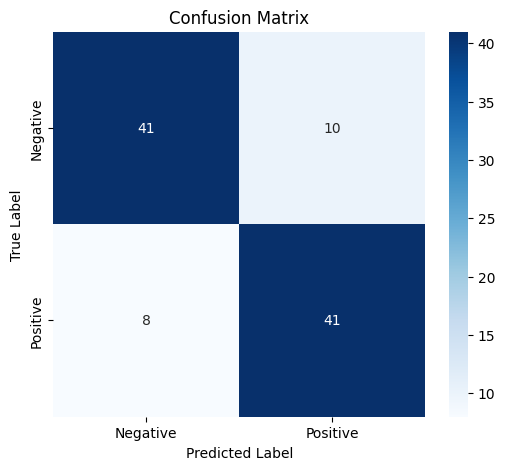

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()